In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from skimage.data import page

In [5]:
def yscaling(y,img):
    r,c=img.shape
    yy=r
    adj=yy//8
    if y<adj:
        return 1
    elif y<2*adj:
        return 2
    elif y<6*adj:
        return 8
    elif y<7*adj:
        return 2
    else:
        return 1

In [6]:
def get_table(img):
    imgg=img.copy()
    xx=np.zeros_like(img)
    xy=np.zeros_like(img)
    xz=np.zeros_like(img)
    Timg=np.zeros_like(img)
    
    ss=np.zeros_like(img)

    otsu_thresh, thresh = cv2.threshold(imgg, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    
    cnts,hr = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    ################################################################ cnts based on perimater
    cnt_dict={cv2.arcLength(cnt,True):i for i,cnt in enumerate(cnts)}
    
#     print(sorted(list(cnt_dict.keys())))
    sl=sorted(list(cnt_dict.keys()))
    int_list=[cnt_dict[i] for i in sl][::-1]
    
    avg_val=np.average(np.array(sl[::-1][0:int(2*len(sl)/3)]))
    new_cnts=tuple([cnt for cnt in cnts if cv2.arcLength(cnt,True)>avg_val])    
    avgline=np.ones_like(sl)*avg_val
    
    
#     xaxis=np.arange(0,len(sl))
# #     plt.plot(list(cnt_dict.keys()))
#     plt.plot(xaxis,sorted(list(cnt_dict.keys())),xaxis,avgline)
#     plt.show()

    cv2.drawContours(xx,new_cnts,-1,(255,255,255),1)
    
    
    ######################################################## based on area
    cnt_areadict={cv2.contourArea(cnt,True):i for i,cnt in enumerate(cnts)}
    sla=sorted(list(cnt_areadict.keys()))
    int_alist=[cnt_areadict[i] for i in sla][::-1]
    
    avga_val=np.average(np.array(sla[::-1][0:int(2*len(sla)/6)]))
    
    new_acnts=tuple([cnt for cnt in cnts if cv2.contourArea(cnt,True)>avga_val])
    print(">>>>>>>>>>",type(new_acnts),type(cnts))
    
#     avgaline=np.ones_like(sla)*avga_val
#     xaxis=np.arange(0,len(sla))
# #     plt.plot(list(cnt_dict.keys()))
#     plt.plot(xaxis,sorted(list(cnt_areadict.keys())),xaxis,avgaline)
#     plt.show()
    
    cv2.drawContours(xy,new_acnts,-1,(255,255,255),1)
    
    xz=xy+xx
    print(xz.shape)
    
    ####################################################################Contours for script

    
    newT_cnts=tuple([cnt for cnt in cnts if cv2.arcLength(cnt,True)<avg_val])
    for c in newT_cnts:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        x=x+int(w/4)
        y=y+int(h/4)
        w=w+w//4
#         mmout,mout=yscaling(y,img, 0.1,10)
#         print(">>>>>>>",mout,mmout)
# #         h=h*2
#         h=h*mmout//mout
        h=h//yscaling(y,img)
#         print(y)
        cv2.rectangle(Timg,(x,y),(x+w,y+h),(255,255,255),-1)

#     cv2.drawContours(Timg,newT_cnts,-1,(255,255,255),1)

    kkernel =np.ones((2,2),np.uint8)
    Timg=cv2.erode(Timg,kkernel,iterations=2)
    
    
    T_cnts,hr = cv2.findContours(Timg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    Tcnt_dict={cv2.arcLength(cnt,True):i for i,cnt in enumerate(T_cnts)}
    
#     print(sorted(list(cnt_dict.keys())))
    Tsl=sorted(list(Tcnt_dict.keys()))
    Tint_list=[Tcnt_dict[i] for i in Tsl][::-1]
    
    Tavg_val=np.average(np.array(Tsl[::-1]))
    Tnew_cnts=tuple([cnt for cnt in T_cnts if cv2.arcLength(cnt,True)>Tavg_val])
#     print(">>>>>>>>>>",type(new_cnts),type(cnts))
    
    Tavgline=np.ones_like(Tsl)*Tavg_val
    xaxis=np.arange(0,len(Tsl))
#     plt.plot(list(cnt_dict.keys()))
    plt.plot(xaxis,sorted(list(Tcnt_dict.keys())),xaxis,Tavgline)
    plt.show()
    for c in Tnew_cnts:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(ss,(x,y),(x+w,y+h),(255,255,255),-1)



    cv2.imshow('z', xz)
    cv2.imshow('o', img)
    cv2.imshow("Text",Timg)
    cv2.imshow("Header",ss)

    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return xz

    
    

In [20]:
im_path = "sample_table.png"

>>>>>>>>>> <class 'tuple'> <class 'tuple'>
(609, 953)


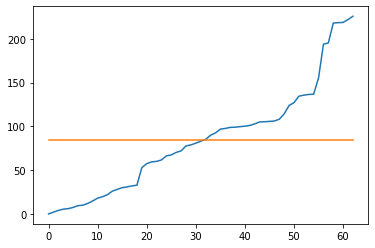

QObject::moveToThread: Current thread (0x55b57501bb90) is not the object's thread (0x55b576490440).
Cannot move to target thread (0x55b57501bb90)

QObject::moveToThread: Current thread (0x55b57501bb90) is not the object's thread (0x55b576490440).
Cannot move to target thread (0x55b57501bb90)

QObject::moveToThread: Current thread (0x55b57501bb90) is not the object's thread (0x55b576490440).
Cannot move to target thread (0x55b57501bb90)

QObject::moveToThread: Current thread (0x55b57501bb90) is not the object's thread (0x55b576490440).
Cannot move to target thread (0x55b57501bb90)

QObject::moveToThread: Current thread (0x55b57501bb90) is not the object's thread (0x55b576490440).
Cannot move to target thread (0x55b57501bb90)

QObject::moveToThread: Current thread (0x55b57501bb90) is not the object's thread (0x55b576490440).
Cannot move to target thread (0x55b57501bb90)

QObject::moveToThread: Current thread (0x55b57501bb90) is not the object's thread (0x55b576490440).
Cannot move to tar

array([[255, 255, 255, ..., 255, 255, 255],
       [255,   0,   0, ..., 254,   0, 255],
       [255,   0,   0, ...,   0, 254, 255],
       ...,
       [255,   0,   0, ..., 254,   0, 255],
       [255,   0,   0, ...,   0,   0, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [21]:
get_table(cv2.imread(im_path,0))